# Latar Belakang

Perusahaan transportasi udara ingin memastikan bahwa bisnis mereka berjalan dengan baik dan efisien, termasuk dalam hal pemasaran. Oleh karena itu, perusahaan tersebut ingin mendapatkan laporan yang dapat memberikan informasi tentang hasil kerja usaha mereka, seperti tingkat penggunaan jasa transportasi udara dan pola penggunaannya, agar dapat melakukan analisis yang akurat untuk menentukan demografi yang tepat untuk ditargetkan dalam upaya pemasaran. Dengan mengetahui demografi yang tepat, perusahaan dapat memaksimalkan anggaran pemasaran mereka dan meningkatkan efektivitas pemasaran agar lebih efisien dan efektif dalam mencapai target pasar yang diinginkan. Selain itu, Kepuasan pelanggan dan loyalitas pelanggan adalah dua hal yang saling terkait dan mempengaruhi keuntungan perusahaan. Kepuasan pelanggan merujuk pada tingkat kepuasan yang dirasakan oleh pelanggan terhadap produk atau layanan perusahaan. Sementara loyalitas pelanggan merujuk pada kecenderungan pelanggan untuk terus menggunakan produk atau layanan perusahaan.

Kepuasan pelanggan dapat mempengaruhi loyalitas pelanggan karena pelanggan yang puas cenderung lebih cenderung untuk kembali menggunakan produk atau layanan perusahaan di masa depan. Selain itu, pelanggan yang puas juga lebih mungkin untuk merekomendasikan perusahaan kepada orang lain.

Loyalitas pelanggan juga berdampak positif pada profitabilitas perusahaan karena pelanggan yang setia cenderung melakukan pembelian yang lebih sering dan dalam jumlah yang lebih besar. Selain itu, pelanggan yang setia juga lebih mungkin untuk membeli produk atau layanan tambahan yang ditawarkan oleh perusahaan.

Oleh karena itu, penting bagi perusahaan untuk meningkatkan tingkat kepuasan pelanggan dan mempertahankan loyalitas pelanggan. Beberapa strategi yang dapat dilakukan oleh perusahaan untuk mencapai tujuan ini meliputi meningkatkan kualitas produk atau layanan, memberikan pelayanan pelanggan yang baik, dan menawarkan program loyalitas pelanggan yang menarik. Dengan melakukan hal-hal ini, perusahaan dapat meningkatkan kepuasan pelanggan dan mempertahankan loyalitas pelanggan, yang pada akhirnya dapat menghasilkan profit yang lebih besar untuk perusahaan. Sehingga, perusahaan perlu mengetahui aspek penting yang membuat pelanggan merasa puas terhadap pelayanan perusahaan.


## Pernyataan Masalah

Berdasarkan informasi tersebut, pernyataan masalah yang dapat dibuat adalah sebagai berikut: Siapa penumpang yang paling sering menggunakan jasa penerbangan? Dan, Aspek apa yang penting bagi penumpang perusahaan?


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
# warnings.filterwarnings("ignore")

# Data
Untuk melaksanakan tugas kita, kita akan menganalisa data yang diberikan ke kita `airline passanger satisfaction.csv`.

## Data Understanding

Deskripsi data ketika sekilas melihat dataset dan deskripsi masing-masing kolom dan ekspektasi value dataset tersebut:

| Nama Kolom                     | Deskripsi                                                                              | Tipe     | Possible Value                                     |
| ------------------------------ | -------------------------------------------------------------------------------------- | -------- | -------------------------------------------------- |
| **id**                         | Identitas unik untuk setiap pelanggan.                                                 | Numerik  | Integer                                            |
| **Gender**                     | Jenis kelamin pelanggan.                                                               | Kategori | **Laki-laki** atau **Perempuan**                   |
| **Customer Type**              | Menunjukkan apakah pelanggan merupakan "Pelanggan Setia" atau "Pelanggan Tidak Setia". | Kategori | **Pelanggan Setia** atau **Pelanggan Tidak Setia** |
| **Age**                        | Usia pelanggan.                                                                        | Numerik  | Integer                                            |
| **Type of Travel**             | Menunjukkan tujuan perjalanan.                                                         | Kategori | **Perjalanan Bisnis** atau **Perjalanan Pribadi**  |
| **Class**                      | Kelas penerbangan.                                                                     | Kategori | **Eco**, **Eco Plus**, atau **Bisnis**             |
| **Flight Distance**            | Jarak yang ditempuh dalam penerbangan, dalam kilometer.                                | Numerik  | Integer                                            |
| **Inflight wifi service**      | Tingkat layanan wifi di dalam pesawat.                                                 | Numerik  | 1-5                                                |
| **Departure/Arrival time**     | Tingkat kenyamanan waktu keberangkatan dan kedatangan.                                 | Numerik  | 1-5                                                |
| **Ease of Online booking**     | Tingkat kemudahan memesan tiket secara online.                                         | Numerik  | 1-5                                                |
| **Gate location**              | Penilaian pelanggan mengenai lokasi gerbang.                                           | Numerik  | 1-5                                                |
| **Food and drink**             | Kualitas makanan dan minuman.                                                          | Numerik  | 1-5                                                |
| **Online boarding**            | Kemudahan dalam proses boarding secara online.                                         | Numerik  | 1-5                                                |
| **Seat comfort**               | Tingkat kenyamanan tempat duduk.                                                       | Numerik  | 1-5                                                |
| **Inflight entertainment**     | Kualitas hiburan di dalam pesawat.                                                     | Numerik  | 1-5                                                |
| **On-board service**           | Kualitas layanan di dalam pesawat.                                                     | Numerik  | 1-5                                                |
| **Leg room service**           | Kualitas layanan ruang kaki.                                                           | Numerik  | 1-5                                                |
| **Baggage handling**           | Kualitas penanganan bagasi.                                                            | Numerik  | 1-5                                                |
| **Checkin service**            | Kualitas layanan check-in.                                                             | Numerik  | 1-5                                                |
| **Inflight service**           | Kualitas layanan di dalam pesawat.                                                     | Numerik  | 1-5                                                |
| **Cleanliness**                | Tingkat kebersihan pesawat.                                                            | Numerik  | 1-5                                                |
| **Departure Delay in Minutes** | Jumlah menit keterlambatan keberangkatan pesawat.                                      | Numerik  | Integer                                            |
| **satisfaction**               | Tingkat kepuasan pelanggan.                                                            | Kategori | **Puas** atau **Tidak puas**                       |


### Read data
Berikut 5 baris awal dan akhir dari dataset tersebut

In [102]:
df=pd.read_csv('airline passanger satisfaction.csv')
df.info()
display(df.head(),df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


### Describe Data

Deskripsi data dari dataset tersebut

In [103]:

def describe_dataframe():
    # Create a dictionary to map data types to their corresponding possible values
    handle_int = lambda col: '[%d ~ %d]' % (col.min(), col.max())
    possible_values = {
        'object': lambda col: ', '.join(map(str, col.unique())),
        'category': lambda col: ', '.join(map(str, col.cat.categories)),
        'int64': handle_int,
        'int32': handle_int,
        'int16': handle_int,
        'int8': handle_int,
        'float64': lambda col: '[%0.2f ~ %0.2f]' % (col.min(), col.max())
    }

    # Get the column information
    info_md = pd.DataFrame(df.dtypes).rename(columns={0:'Data Type'})
    info_md['Non-Null Count'] = df.count().values
    info_md['Unique Count'] = df.nunique().values
    info_md.reset_index(inplace=True)
    info_md.rename(columns={'index': 'Column Name'}, inplace=True)

    # Drop the first row
    info_md.drop(0, axis=0, inplace=True)

    # Add a new column called "Possible Values"
    info_md['Possible Values'] = ''

    # Populate the "Possible Values" column based on the column's data type and unique values
    for i, row in info_md.iterrows():
        col_name = row['Column Name']
        dtype = str(row['Data Type'])
        col = df[col_name]
        
        # Get the possible values for the column's data type
        values = possible_values[dtype](col) if dtype in possible_values else dtype
        
        # Update the "Possible Values" column
        info_md.at[i, 'Possible Values'] = values
    return info_md

display(describe_dataframe())

,Column Name,Data Type,Non-Null Count,Unique Count,Possible Values
1,id,int64,103904,103904,[1 ~ 129880]
2,Gender,object,103904,2,"Male, Female"
3,Customer Type,object,103904,2,"Loyal Customer, disloyal Customer"
4,Age,int64,103904,75,[7 ~ 85]
5,Type of Travel,object,103904,2,"Personal Travel, Business travel"
6,Class,object,103904,3,"Eco Plus, Business, Eco"
7,Flight Distance,int64,103904,3802,[31 ~ 4983]
8,Inflight wifi service,int64,103904,6,[0 ~ 5]
9,Departure/Arrival time convenient,int64,103904,6,[0 ~ 5]
10,Ease of Online booking,int64,103904,6,[0 ~ 5]


#### Data categorize each columns
Berdasarkan deskripsi dari atas, kita bisa tentukan bahwa terdapat 3 tipe data yang cocok dengan dataset tersebut, yakni
- `int8`: 1 byte, atau numerik dari -128 ~ 127
- `int16`: 2 byte, atau numerik dari -32,768 ~ 32,767
- `int32`: 4 byte, atau numerik dari -2,147,483,648 ~ 2,147,483,647
- `categorical`

In [104]:
int8_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Baggage handling',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service',
                'Inflight service', 'Cleanliness']
int16_cols = ['Age']
int32_cols = ['id', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

#### Describe Numbers

Deskripsi lebih detail data angka pada dataset

In [105]:
df.drop(columns=['Unnamed: 0','id']).describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.37971,15.11496,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.44838,997.14728,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.72968,1.32783,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.06030,1.52508,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.75690,1.39893,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.97688,1.27762,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.20213,1.32953,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.25038,1.34951,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.43940,1.31909,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.35816,1.33299,0.0,2.0,4.0,4.0,5.0


#### Describe Category objects
Deskripsi lebih detail data kategori

In [106]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#### Describe Missing Resources

Deskripsi detail data yang rusak pada dataset ini

,Count,%
Arrival Delay in Minutes,310,0.298352


<Axes: >

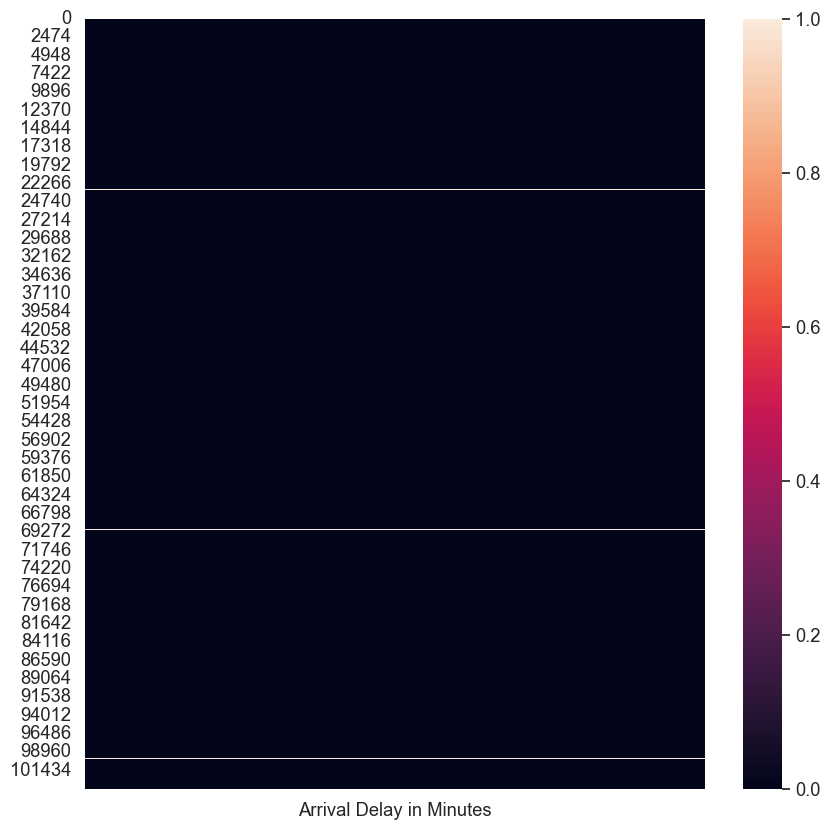

In [107]:
missing_values = df.isna().sum()
missing_pct = missing_values / len(df) * 100
missing_df = pd.concat([missing_values, missing_pct], axis=1)
missing_df.columns = ['Count', '%']
missing_df = missing_df[missing_df['Count'] > 0]
display(missing_df)
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Arrival Delay in Minutes']].isna())


Disini kita bisa melihat *`Arrival Delay in Minutes`* memiliki 310 rows yang rusak/kosong, atau sekitar `0.3%` dari total dataset yang bisa dibilang lumayan kecil dan insignifikan. Akan tetapi, kita akan tetap mengunakan data ini dengan cara mendapatkan rata-rata total dari kolom ini dan beri nilai tersebut ke row yang rusak.

#### Describe data overview

Secara umum, kita bisa melihat bahwa:
* Dataset ini memiliki 25 columns dan 103904 rows
* Hanya `Arrival Delay in Minutes` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Column `id` berisikan id unik untuk setiap penumpang, sehingga tidak relevan dalam analisis dan bisa dihapus.
* Column `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction` bersifat kategori.
* Beberapa column bisa diubah tipe datanya agar hemat performa dan memori. *(opsional)*

## Clean Data

Agar kita bisa menganalisa data, kita perlu membersihkan dataset kita dan memproses lebih lanjut agar bisa mendapatkan statistika yang akurat.

### Dropping Duplicates

Berdasarkan describe diatas, data yang perlu dihilangkan duplikatnya berupa column id, maka akan kita hapus duplikatnya, walau semuanya sudah unik.


In [108]:
# Drop duplicate ID as it's invalid
df.drop_duplicates(subset=['id'], inplace=True)


### Outliers

Disini kita akan memeriksa data yang kelainan, sesuai ekspektasi tabel `Data Understanding` di atas.

In [109]:
def check_outliers():
    # Create an empty dictionary to store the counts for each column
    counts_dict = {}

    # Loop through each column in the int8_cols list
    for col in int8_cols:
        # Get the unique values and their count for the current column
        unique_values, count = np.unique(df[col], return_counts=True)
        # Round the unique values to the nearest integer
        unique_values = np.round(unique_values)
        # Convert the unique values to integers
        unique_values = unique_values.astype('int')
        # Combine the counts for floating point values that round to the same integer value
        unique_counts = {value: sum(count[unique_values == value]) for value in np.unique(unique_values)}
        # Create a new dictionary to store the counts for the current column
        col_dict = {}
        # Add the counts for each unique value to the dictionary
        for value, value_count in unique_counts.items():
            col_dict[value] = value_count
        # Add the dictionary for the current column to the counts_dict
        counts_dict[col] = col_dict

    # Create a dataframe from the counts_dict
    counts_df = pd.DataFrame(counts_dict)

    # Transpose the dataframe to make the columns represent the unique values
    counts_df = counts_df.transpose()

    # Fill missing values with 0
    counts_df.fillna(0, inplace=True)
    counts_df = counts_df.astype('int32')

    # Create a boolean mask to check for zero values
    mask = (counts_df == 0)

    # Calculate the percentage of each count and add a new column for each count
    total_rows = len(df)
    for col in counts_df.columns:
        counts_df[f'{col} (%)'] = counts_df[col] / total_rows * 100

    # Reorder the columns to have the count and percentage columns next to each other
    new_cols = []
    for col in counts_df.columns:
        if str(col).endswith(' (%)'):
            continue
        else:
            new_cols.append(col)
            new_cols.append(f'{col} (%)')
    counts_df = counts_df[new_cols]

    # Use the .any() method to check for any zero values along the columns axis and create a new column called "Valid?"
    counts_df['Valid?'] = mask.any(axis=1)

    # Sort the dataframe by the "Valid?" column
    counts_df = counts_df.sort_values(by=['Valid?'], ascending=False).round(decimals=2)

    return counts_df

# Print the resulting table
display(check_outliers())


,0,0 (%),1,1 (%),2,2 (%),3,3 (%),4,4 (%),5,5 (%),Valid?
Baggage handling,0,0.00,7237,6.97,11521,11.09,20632,19.86,37383,35.98,27131,26.11,True
Inflight wifi service,3103,2.99,17840,17.17,25830,24.86,25868,24.90,19794,19.05,11469,11.04,False
Departure/Arrival time convenient,5300,5.10,15498,14.92,17191,16.55,17966,17.29,25546,24.59,22403,21.56,False
Ease of Online booking,4487,4.32,17525,16.87,24021,23.12,24449,23.53,19571,18.84,13851,13.33,False
Gate location,1,0.00,17562,16.90,19459,18.73,28577,27.50,24426,23.51,13879,13.36,False
Food and drink,107,0.10,12837,12.35,21988,21.16,22300,21.46,24359,23.44,22313,21.47,False
Online boarding,2428,2.34,10692,10.29,17505,16.85,21804,20.98,30762,29.61,20713,19.93,False
Seat comfort,1,0.00,12075,11.62,14897,14.34,18696,17.99,31765,30.57,26470,25.48,False
Inflight entertainment,14,0.01,12478,12.01,17637,16.97,19139,18.42,29423,28.32,25213,24.27,False
On-board service,3,0.00,11872,11.43,14681,14.13,22833,21.98,30867,29.71,23648,22.76,False


#### Outlier description
Berdasarkan output diatas, outlier yang ditemukan berupa:

| Nama Kolom                 | Alasan    | Aksi yang dilakukan                                                                |
| -------------------------- | --------- | ---------------------------------------------------------------------------------- |
| **Inflight wifi service**  | `Value 0` | Row di ommit ketika analisa menggunakan row ini karena fasilitas tidak dipilih/ada |
| **Departure/Arrival time** | `Value 0` | Row di ommit ketika analisa menggunakan row ini                                    |
| **Ease of Online booking** | `Value 0` | Row di ommit ketika analisa menggunakan row ini                                    |
| **Gate location**          | `Value 0` | Value dijadikan modus                                                              |
| **Food and drink**         | `Value 0` | Row di ommit ketika analisa menggunakan row ini karena fasilitas tidak dipilih/ada |
| **Online boarding**        | `Value 0` | Row di ommit ketika analisa menggunakan row ini                                    |
| **Seat comfort**           | `Value 0` | Value dijadikan modus                                                              |
| **Inflight entertainment** | `Value 0` | Row di ommit ketika analisa menggunakan row ini karena fasilitas tidak dipilih/ada |
| **On-board service**       | `Value 0` | Row di ommit ketika analisa menggunakan row ini karena fasilitas tidak dipilih/ada |
| **Leg room service**       | `Value 0` | Value dijadikan modus                                                              |
| **Checkin service**        | `Value 0` | Row di ommit ketika analisa menggunakan row ini                                    |
| **Inflight service**       | `Value 0` | Row di ommit ketika analisa menggunakan row ini                                    |
| **Cleanliness**            | `Value 0` | Value dijadikan modus                                                              |


### Column actions

Aksi yang kita akan lakukan untuk Outlier dan value yang missing adalah sebagai berikut:
- *`Destroy`*: Kita hapus row data agar tidak di analisis. Untuk persentase kecil bukanlah hal yang besar, tapi untuk persentase dataset besar, alangkah baiknya tidak dilakukan
- *`Ommit`*: Kita abaikan untuk sekarang dan ambil row yang tidak di ommit untuk analisis.
- *`Mean`*: Ganti value yang invalid menjadi rata-rata dari dataset
- *`Mode`*: Ganti value yang invalid menjadi modus dari dataset

In [110]:

omit_columns = ['Inflight wifi service',
                'Food and drink',
                'Inflight entertainment',
                'On-board service',
                'Departure/Arrival time',
                'Ease of Online booking',
                'Online boarding',
                'Checkin service',
                'Inflight service']
                
def ommit_zero(column):
    return df[df[column] != 0]

mean_columns = ['Flight Distance',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes']

mode_columns = ['Gate location',
                'Seat comfort',
                'Leg room service',
                'Cleanliness']

destroy_columns = ['id', *categorical_columns]



### Handle Missing Values

Kita handle missing/invalid values pada dataset.
Berdasarkan `Column Actions` berikut yang kita lakukan:
- *`Destroy`*: Kita hapus row yang dimana [`id`, `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction`] bernilai N/A karena susah untuk menebak data yang mungkin dimasukan untuk masing-masing column ini dan N rows yang kosong < `5%` jadi aman dihapus
- *`Ommit`*: Kita abaikan untuk sekarang [`Inflight wifi service`,
                `Food and drink`,
                `Inflight entertainment`,
                `On-board service`,
                `Departure/Arrival time`,
                `Ease of Online booking`,
                `Online boarding`,
                `Checkin service`,
                `Inflight service`].
- *`Mean`*: Ganti value yang invalid menjadi rata-rata dari dataset untuk [`Flight Distance`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`]
- *`Mode`*: Ganti value yang invalid menjadi modus dari dataset untuk [`Gate location`, `Seat comfort`, `Leg room service`, `Cleanliness`]

In [111]:
df.dropna(subset=destroy_columns, inplace=True)

# Remove 0 for mode column
df[mode_columns] = df[mode_columns].replace(0, np.nan)

# Replace mean and mode column with each method
df[mean_columns] = df[mean_columns].fillna(df[mean_columns].mean())
df[mode_columns] = df[mode_columns].fillna(df[mode_columns].mode().iloc[0])

### Formatting
Format sesuai dengan tipedata yang kita tulis di `Data categorize each columns`

In [112]:
df[int8_cols] = df[int8_cols].astype('int8')
df[int16_cols] = df[int16_cols].astype('int16')
df[int32_cols] = df[int32_cols].astype('int32')
df[categorical_columns] = df[categorical_columns].astype('category')


# Create age ranges based on the "Age" column
df['Age Range'] = pd.cut(df['Age'], bins=[0, 6, 12, 18, 24, 29, 39, 49, 59, 69, 79, 120], 
                         labels=['0-6', '7-12', '13-18', '19-24', '25-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Define the description for each age range
age_range_desc = {
    '0-6': 'Infant/Toddler',
    '7-12': 'Child',
    '13-18': 'Teenager',
    '19-24': 'Young Adult',
    '25-29': 'Adult',
    '30-39': 'Young Middle-Aged Adult',
    '40-49': 'Middle-Aged Adult',
    '50-59': 'Young Senior Citizen',
    '60-69': 'Senior Citizen',
    '70-79': 'Elderly',
    '80+': 'Late Elderly'
}

def extract_lower_limit(age_range):
    match = re.search(r'\d+', age_range)
    if match:
        return int(match.group())
    return 0

### Result
Hasil dari pembersihan dataset. Data sudah siap untuk dianalisa

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int32   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int16   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int32   
 8   Inflight wifi service              103904 non-null  int8    
 9   Departure/Arrival time convenient  103904 non-null  int8    
 10  Ease of Online booking             103904 non-null  int8    
 11  Gate location             

In [114]:
display(describe_dataframe(), check_outliers())

,Column Name,Data Type,Non-Null Count,Unique Count,Possible Values
1,id,int32,103904,103904,[1 ~ 129880]
2,Gender,category,103904,2,"Female, Male"
3,Customer Type,category,103904,2,"Loyal Customer, disloyal Customer"
4,Age,int16,103904,75,[7 ~ 85]
5,Type of Travel,category,103904,2,"Business travel, Personal Travel"
6,Class,category,103904,3,"Business, Eco, Eco Plus"
7,Flight Distance,int32,103904,3802,[31 ~ 4983]
8,Inflight wifi service,int8,103904,6,[0 ~ 5]
9,Departure/Arrival time convenient,int8,103904,6,[0 ~ 5]
10,Ease of Online booking,int8,103904,6,[0 ~ 5]


,0,0 (%),1,1 (%),2,2 (%),3,3 (%),4,4 (%),5,5 (%),Valid?
Gate location,0,0.00,17562,16.90,19459,18.73,28578,27.50,24426,23.51,13879,13.36,True
Seat comfort,0,0.00,12075,11.62,14897,14.34,18696,17.99,31766,30.57,26470,25.48,True
Baggage handling,0,0.00,7237,6.97,11521,11.09,20632,19.86,37383,35.98,27131,26.11,True
Leg room service,0,0.00,10353,9.96,19525,18.79,20098,19.34,29261,28.16,24667,23.74,True
Cleanliness,0,0.00,13318,12.82,16132,15.53,24574,23.65,27191,26.17,22689,21.84,True
Inflight wifi service,3103,2.99,17840,17.17,25830,24.86,25868,24.90,19794,19.05,11469,11.04,False
Departure/Arrival time convenient,5300,5.10,15498,14.92,17191,16.55,17966,17.29,25546,24.59,22403,21.56,False
Ease of Online booking,4487,4.32,17525,16.87,24021,23.12,24449,23.53,19571,18.84,13851,13.33,False
Food and drink,107,0.10,12837,12.35,21988,21.16,22300,21.46,24359,23.44,22313,21.47,False
Online boarding,2428,2.34,10692,10.29,17505,16.85,21804,20.98,30762,29.61,20713,19.93,False


# Visualization and Analysis

### Impact of Satisfaction to Loyalty

In [ ]:
import plotly.graph_objs as go

# Copy the dataframe and rename the values in the 'Customer Type' and 'satisfaction' columns
df_copy = df.copy()
df_copy['Customer Type'] = df_copy['Customer Type'].replace({'Loyal Customer': 'Loyal', 'disloyal Customer': 'Disloyal'})
df_copy['satisfaction'] = df_copy['satisfaction'].replace({'neutral or dissatisfied': 'Unsatisfied', 'satisfied': 'Satisfied'})

# Use cross-tabulation to get the count of each customer type and satisfaction level for each gender
ct = pd.crosstab(index=[df_copy['Gender'], df_copy['satisfaction']], columns=df_copy['Customer Type'], normalize='index')

# Convert the cross-tabulation result to a DataFrame and reset the index
ct_df = ct.reset_index()

# Prepare data for the stacked bar chart
x_labels = ct_df['Gender'].astype(str) + ' ' + ct_df['satisfaction'].astype(str)

fig = go.Figure(data=[
    go.Bar(name='Disloyal', x=x_labels, y=ct_df['Disloyal']),
    go.Bar(name='Loyal', x=x_labels, y=ct_df['Loyal'])
])

# Set the labels and legend
fig.update_layout(
    barmode='stack',
    xaxis_title='Gender and Satisfaction Level',
    yaxis_title='Percentage of Customer Type',
    title='Percentage of Customer Type by Gender and Satisfaction Level',
    legend_title='Customer Type'
)

fig.show()


Grafik tersebut menunjukkan hubungan antara tingkat kepuasan pelanggan dan tingkat loyalitas pelanggan terhadap perusahaan transportasi udara. Dari grafik, terlihat bahwa semakin tinggi tingkat kepuasan pelanggan, semakin tinggi juga tingkat loyalitas pelanggan terhadap perusahaan. Dengan kata lain, pelanggan yang merasa puas dengan layanan yang diberikan oleh perusahaan lebih cenderung untuk kembali menggunakan jasa perusahaan di masa depan dan bahkan merekomendasikan perusahaan kepada orang lain.

Hal ini penting untuk dipahami oleh perusahaan transportasi udara karena dapat membantu mereka mempertahankan pangsa pasar yang ada dan bahkan memperluas pangsa pasar mereka. Pelanggan yang setia cenderung melakukan pembelian yang lebih sering dan dalam jumlah yang lebih besar, serta lebih mungkin untuk membeli produk atau layanan tambahan yang ditawarkan oleh perusahaan.

## Passenger

#### By Age

In [115]:
import plotly.graph_objs as go

# Group by gender and age range and count the number of passengers in each group
gender_age_counts = df.groupby(['Gender', 'Age Range']).size().reset_index(name='Count')

# Create a stacked bar chart using Plotly
fig = go.Figure()

# Add bars for Male and Female passengers
fig.add_trace(go.Bar(
    x=gender_age_counts[gender_age_counts['Gender'] == 'Male']['Count'],
    y=gender_age_counts[gender_age_counts['Gender'] == 'Male']['Age Range'],
    name='Male',
    orientation='h',
    marker=dict(color='blue', opacity=0.8),
    text=['{} ({})'.format(age_range_desc[a], c) for a, c in zip(gender_age_counts[gender_age_counts['Gender'] == 'Male']['Age Range'], gender_age_counts[gender_age_counts['Gender'] == 'Male']['Count'])],
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=-gender_age_counts[gender_age_counts['Gender'] == 'Female']['Count'],
    y=gender_age_counts[gender_age_counts['Gender'] == 'Female']['Age Range'],
    name='Female',
    orientation='h',
    marker=dict(color='red', opacity=0.8),
    text=['{} ({})'.format(age_range_desc[a], c) for a, c in zip(gender_age_counts[gender_age_counts['Gender'] == 'Female']['Age Range'], gender_age_counts[gender_age_counts['Gender'] == 'Female']['Count'])],
    textposition='auto',
))

# Set the layout properties
fig.update_layout(
    barmode='overlay',
    title='Population Pyramid by Gender',
    xaxis=dict(title='Number of Passengers', tickmode='linear', dtick=1000, range=[-15000, 15000]),
    yaxis=dict(title='Age Range'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


Demografi dari 103904 penumpang masing-masing gender dengan umurnya disini kurang lebih mirip.
Rata-rata umur penumpang disini adalah umur 30-59 tahun. ~(60k penumpang)
Berdasarkan data ini bisa disimpulkan target optimal untuk pemasaran jangka pendek adalah demografi 30-59 tahun.

Akan tetapi untuk jangka panjang alangkah baiknya dilakukan juga pemasaran untuk demografi 13-29 tahun karena setelah umur 60 tahun jumlah penumpang demografi berkurang sebanyak 50%.

### By Loyalty

In [116]:


# Group the data by gender, loyalty, and age range, and count the number of records in each group
grouped = df.groupby(['Gender', 'Customer Type', 'Age Range']).size().reset_index(name='Count')

# Calculate the percentage of records for each gender and loyalty
loyalty_percentages = df.groupby('Gender')['Customer Type'].value_counts(normalize=True).unstack() * 100

# Create a 2x3 grid of subplots
fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'sunburst'}, {'type': 'sunburst'}], [{'type': 'sunburst'}, {'type': 'sunburst'}]])

# Create pie charts for the male and female loyalty ratios
for index, gender in enumerate(['Male', 'Female']):
    total_count = grouped.loc[grouped['Gender'] == gender, 'Count'].sum()
    loyalty_ratio = loyalty_percentages.loc[gender, 'Loyal Customer']
    disloyalty_ratio = loyalty_percentages.loc[gender, 'disloyal Customer']
    
    fig.add_pie(values=[loyalty_ratio, disloyalty_ratio], labels=[f"Loyal ({loyalty_ratio:.1f}%)", f"Disloyal ({disloyalty_ratio:.1f}%)"], row=1, col=index+1, name=f"{gender} Loyalty Ratio")

# Create sunburst plots for each gender and loyalty combination (disloyal and loyal customers)
for index, gender, loyalty in zip(range(2, 6), ['Male', 'Female']*2, ['disloyal Customer']*2 + ['Loyal Customer']*2):
    # Filter the data for the current gender and loyalty combination
    data = grouped[(grouped['Gender'] == gender) & (grouped['Customer Type'] == loyalty)]
    
    # Create a sunburst plot of the age distribution for this gender and loyalty combination
    sunburst = go.Sunburst(
        ids=[f"{gender} {loyalty}/{age_range}" for age_range in data['Age Range']],
        labels=data['Age Range'],
        parents=[f"{gender} {loyalty}"] * len(data),
        values=data['Count'],
        branchvalues='total',
    )
    
    fig.add_trace(sunburst, row=(index//2)+1, col=(index % 2)+1)

fig.update_layout(title='Passenger Age Distribution and Loyalty Ratios by Gender', height=900)
fig.show()


Seperti kesimpulan sebelumnya, disini, target pasar 13-29 tahun mengambil majoritas dari pelanggan Disloyal. Untuk gender data kedua gender lumayan mirip jadi tidak dapat diambil kesimpulan dari sini

### By Type of Travel


In [117]:
# Group the data by gender, type of travel, and age range, and count the number of records in each group
grouped = df.groupby(['Gender', 'Type of Travel', 'Age Range']).size().reset_index(name='Count')

# Calculate the percentage of records for each gender and type of travel
travel_percentages = df.groupby('Gender')['Type of Travel'].value_counts(normalize=True).unstack() * 100

# Create a 2x3 grid of subplots
fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'sunburst'}, {'type': 'sunburst'}], [{'type': 'sunburst'}, {'type': 'sunburst'}]])

# Create pie charts for the male and female type of travel ratios
for index, gender in enumerate(['Male', 'Female']):
    total_count = grouped.loc[grouped['Gender'] == gender, 'Count'].sum()
    business_ratio = travel_percentages.loc[gender, 'Business travel']
    personal_ratio = travel_percentages.loc[gender, 'Personal Travel']
    
    fig.add_pie(values=[business_ratio, personal_ratio], labels=[f"Business ({business_ratio:.1f}%)", f"Personal ({personal_ratio:.1f}%)"], row=1, col=index+1, name=f"{gender} Travel Type Ratio")

# Create sunburst plots for each gender and type of travel combination (business and personal travel)
for index, gender, travel_type in zip(range(2, 6), ['Male', 'Female']*2, ['Business travel']*2 + ['Personal Travel']*2):
    # Filter the data for the current gender and type of travel combination
    data = grouped[(grouped['Gender'] == gender) & (grouped['Type of Travel'] == travel_type)]
    
    # Create a sunburst plot of the age distribution for this gender and type of travel combination
    sunburst = go.Sunburst(
        ids=[f"{gender} {travel_type}/{age_range}" for age_range in data['Age Range']],
        labels=data['Age Range'],
        parents=[f"{gender} {travel_type}"] * len(data),
        values=data['Count'],
        branchvalues='total',
    )
    
    fig.add_trace(sunburst, row=(index//2)+1, col=(index % 2)+1)

fig.update_layout(title='Passenger Age Distribution and Travel Type Ratios by Gender', height=900)
fig.show()


Disini kita bisa lihat bahwa demografi 30-59 sering menjadi pelanggan dengan alasan Usaha, dan sebaliknya Alasan Personal lumayan spread out jadi tidak bisa di jadikan tumpuan untuk analisa.

### By Class


In [118]:
# Group the data by gender, class, and age range, and count the number of records in each group
grouped = df.groupby(['Gender', 'Class', 'Age Range']).size().reset_index(name='Count')

# Calculate the percentage of records for each gender and class
class_percentages = df.groupby('Gender')['Class'].value_counts(normalize=True).unstack() * 100

# Create a 2x4 grid of subplots
fig = make_subplots(rows=4, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'sunburst'}, {'type': 'sunburst'}], [{'type': 'sunburst'}, {'type': 'sunburst'}], [{'type': 'sunburst'}, {'type': 'sunburst'}]])

# Create pie charts for the male and female class ratios
for index, gender in enumerate(['Male', 'Female']):
    total_count = grouped.loc[grouped['Gender'] == gender, 'Count'].sum()
    business_ratio = class_percentages.loc[gender, 'Business']
    eco_ratio = class_percentages.loc[gender, 'Eco']
    eco_plus_ratio = class_percentages.loc[gender, 'Eco Plus']
    
    fig.add_pie(values=[business_ratio, eco_ratio, eco_plus_ratio], labels=[f"Business ({business_ratio:.1f}%)", f"Eco ({eco_ratio:.1f}%)", f"Eco Plus ({eco_plus_ratio:.1f}%)"], row=1, col=index+1, name=f"{gender} Class Ratio")

# Create sunburst plots for each gender and class combination
for index, gender, travel_class in zip(range(2, 10), ['Male', 'Female']*3, ['Business']*2 + ['Eco']*2 + ['Eco Plus']*2):
    # Filter the data for the current gender and class combination
    data = grouped[(grouped['Gender'] == gender) & (grouped['Class'] == travel_class)]
    
    # Create a sunburst plot of the age distribution for this gender and class combination
    sunburst = go.Sunburst(
        ids=[f"{gender} {travel_class}/{age_range}" for age_range in data['Age Range']],
        labels=data['Age Range'],
        parents=[f"{gender} {travel_class}"] * len(data),
        values=data['Count'],
        branchvalues='total',
    )
    
    fig.add_trace(sunburst, row=(index//2)+1, col=(index % 2)+1)

fig.update_layout(title='Passenger Age Distribution and Class Ratios by Gender', height=900)
fig.show()


Disini kita bisa duga bahwa `Type of Travel` berkaitan dengan `Class` yang diambil oleh penumpang.
Demografi 30-59 menggunakan *business class*, sedangkan Eco dan Eco Plus class demografi yang menggunakannya lumayan sama rata. Berikut analisa kalau `Class` berkaitan dengan `Type of Travel`.

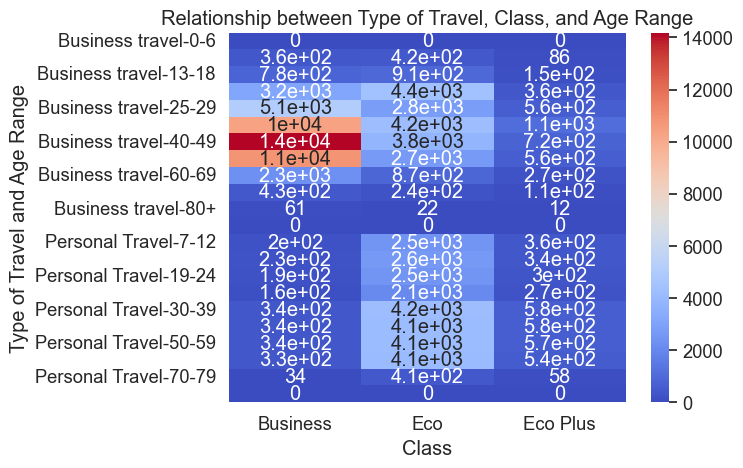

In [119]:

# create a pivot table with Type of Travel, Class, Age Range, and Count
pivot_table = pd.pivot_table(df, index=['Type of Travel', 'Class', 'Age Range'], values='id', aggfunc='count')

# reshape the pivot table to have Type of Travel and Class as columns
pivot_table = pivot_table.reset_index().pivot(index=['Type of Travel', 'Age Range'], columns='Class', values='id')

# create a heatmap of the pivot table
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

# set the plot title and axis labels
plt.title('Relationship between Type of Travel, Class, and Age Range')
plt.xlabel('Class')
plt.ylabel('Type of Travel and Age Range')

# display the plot
plt.show()

Dari heat map ini, bisa dikonfirmasi bahwa  `Type of Travel` *Business* berkaitan dengan `Class` *Business Class*, yang didominasi oleh demografi 30-59 tahun

## Service Rating

In [120]:
import plotly.graph_objects as go

melted_data = df.melt(id_vars='Gender', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
count_data = melted_data.groupby(['Service', 'Rating']).size().reset_index(name='Count')

# Create a bar chart with bars separated by rating
fig = go.Figure()

sorted_ratings = sorted(count_data['Rating'].unique())

for rating in sorted_ratings:
    fig.add_trace(go.Bar(
        x=count_data[count_data['Rating'] == rating]['Service'],
        y=count_data[count_data['Rating'] == rating]['Count'],
        name=f'Rating {rating}'
    ))

fig.update_layout(
    title='Service Ratings Count',
    xaxis_title='Service',
    yaxis_title='Count',
    legend_title='Rating',
    barmode='group'
)

fig.show()


Berdasarkan data service ratings count yang diberikan, dapat disimpulkan bahwa:

Checkin service memiliki jumlah rating 3 dan 4 yang cukup tinggi dibandingkan rating yang lainnya.
Departure/Arrival time convenient, Ease of Online Booking, dan Food and Drink memiliki jumlah rating 4 dan 5 yang cukup tinggi dibandingkan rating yang lainnya.
Inflight Entertainment memiliki jumlah rating 4 yang cukup tinggi dibandingkan rating yang lainnya.
Inflight Service, On-board Service, dan Baggage Handling memiliki jumlah rating 3 dan 4 yang cukup tinggi dibandingkan rating yang lainnya.
Cleanliness, Gate Location, Leg Room Service, dan Seat Comfort memiliki jumlah rating 4 dan 5 yang cukup tinggi dibandingkan rating yang lainnya.
Berdasarkan keseluruhan data, dapat disimpulkan bahwa rating 4 dan 5 lebih banyak diberikan oleh para pengguna pada hampir semua kategori pelayanan. Namun, ada beberapa kategori yang memiliki rating 1 dan 2 yang cukup signifikan seperti Inflight Entertainment, Seat Comfort, dan Food and Drink. Oleh karena itu, perlu adanya perhatian khusus dari pihak maskapai untuk meningkatkan kualitas layanan pada kategori-kategori tersebut.

### By Gender

In [121]:
# Prepare the data by melting the DataFrame
melted_data = df.melt(id_vars='Gender', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
count_data = melted_data.groupby(['Service', 'Rating', 'Gender']).size().reset_index(name='Count')

# Create separate DataFrames for male and female passengers
female_count_data = count_data[count_data['Gender'] == 'Female']
male_count_data = count_data[count_data['Gender'] == 'Male']

# Create a stacked bar chart for female passengers
fig_female = px.bar(female_count_data, x='Service', y='Count', color='Rating', text='Count', title="Female Passenger Satisfaction Ratings by Service")
fig_female.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
fig_female.show()

# Create a stacked bar chart for male passengers
fig_male = px.bar(male_count_data, x='Service', y='Count', color='Rating', text='Count', title="Male Passenger Satisfaction Ratings by Service")
fig_male.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
fig_male.show()


Berdasarkan data grafik di atas dapat dilihat bahwa rata-rata penumpang memberikan rating 3 dan 4

### By Class

In [122]:
# Prepare the data by melting the DataFrame
melted_data = df.melt(id_vars='Class', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
group_by = melted_data.groupby(['Service', 'Rating', 'Class'])
count_data = group_by.size().reset_index(name='Count')

# Get the unique classes in the dataset
unique_classes = df['Class'].unique()

# Create separate bar charts with bars separated by rating, one for each class
for cls in unique_classes:
    class_count_data = count_data[count_data['Class'] == cls]
    
    # Calculate the total count of passengers for each class
    total_count = class_count_data['Count'].sum()
    
    fig = px.bar(class_count_data, x='Service', y='Count', color='Rating', text='Count', title=f"{cls} Passenger ({total_count}) Satisfaction Ratings by Service")
    fig.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
    fig.show()


Disini bisa di lihat Business lebih disegani. Mari kita lihat apa ada korelasi antara ini dengan umur


<Axes: xlabel='Age Range', ylabel='Service'>

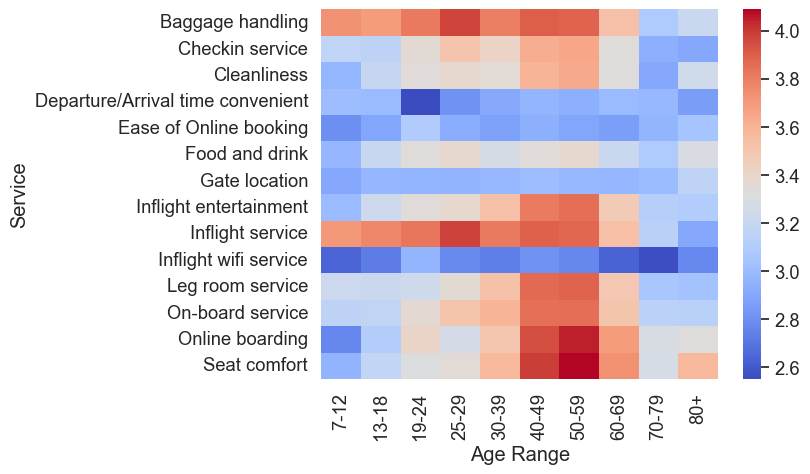

In [133]:
# Filter the dataframe to include only Business class
business_df = df[df['Class'] == 'Business']

# Select only the columns corresponding to the int8_cols
service_cols = ['Age Range'] + int8_cols
services_df = business_df[service_cols]

# Melt int8 columns into a long format
melted_data = services_df.melt(id_vars=['Age Range'], value_vars=int8_cols, var_name='Service', value_name='Rating')

# Create a pivot table with 'Service' as the index, 'Age Range' as the columns, and 'Rating' as the values
pivot_table = pd.pivot_table(melted_data, index='Service', columns='Age Range', values='Rating', aggfunc='mean')

# Create a heatmap of the pivot table
sns.heatmap(pivot_table, cmap='coolwarm')

Bisa sekali lagi dikonfirmasi bahwa ada koneksi antara Class Business class, Dengan demografi 30-59.

### By Type of Travel

In [ ]:
# Prepare the data by melting the DataFrame
melted_data = df.melt(id_vars='Type of Travel', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
count_data = melted_data.groupby(['Service', 'Rating', 'Type of Travel']).size().reset_index(name='Count')

# Get the unique classes in the dataset
unique_classes = df['Type of Travel'].unique()

# Create separate bar charts with bars separated by rating, one for each class
for cls in unique_classes:
    class_count_data = count_data[count_data['Type of Travel'] == cls]
    
    # Calculate the total count of passengers for each class
    total_count = class_count_data['Count'].sum()
    
    fig = px.bar(class_count_data, x='Service', y='Count', color='Rating', text='Count', title=f"{cls} ({total_count})")
    fig.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
    fig.show()


### By Loyalty

In [ ]:
# Prepare the data by melting the DataFrame
melted_data = df.melt(id_vars='Customer Type', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
count_data = melted_data.groupby(['Service', 'Rating', 'Customer Type']).size().reset_index(name='Count')

# Get the unique classes in the dataset
unique_classes = df['Customer Type'].unique()

# Create separate bar charts with bars separated by rating, one for each class
for cls in unique_classes:
    class_count_data = count_data[count_data['Customer Type'] == cls]
    
    # Calculate the total count of passengers for each class
    total_count = class_count_data['Count'].sum()
    
    fig = px.bar(class_count_data, x='Service', y='Count', color='Rating', text='Count', title=f"{cls} ({total_count})")
    fig.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
    fig.show()


### By Age

In [ ]:
# Prepare the data by melting the DataFrame
melted_data = df.melt(id_vars='Age Range', value_vars=int8_cols, var_name='Service', value_name='Rating')

# Count the number of each rating for each service
count_data = melted_data.groupby(['Service', 'Rating', 'Age Range']).size().reset_index(name='Count')

# Get the unique age ranges in the dataset
unique_ranges = sorted(df['Age Range'].unique(), key=extract_lower_limit)

# Create separate bar charts with bars separated by rating, one for each age range
for age_range in unique_ranges:
    range_count_data = count_data[count_data['Age Range'] == age_range]
    
    # Calculate the total count of passengers for each age range
    total_count = range_count_data['Count'].sum()
    
    fig = px.bar(range_count_data, x='Service', y='Count', color='Rating', text='Count', title=f"{age_range} (n={total_count})")
    fig.update_layout(barmode='stack', xaxis_title="Service", yaxis_title="Count", legend_title="Rating")
    fig.show()

## Satisfaction

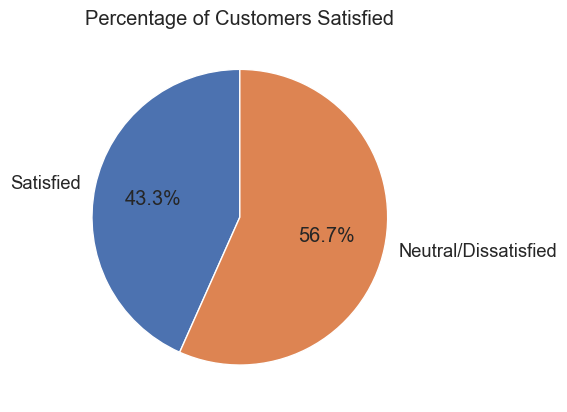

In [141]:
# count the number of customers who are satisfied and not satisfied
satisfied_count = df[df['satisfaction'] == 'satisfied']['satisfaction'].count()
dissatisfied_count = df[df['satisfaction'] == 'neutral or dissatisfied']['satisfaction'].count()

# calculate the percentage of satisfied and dissatisfied customers
total_count = satisfied_count + dissatisfied_count
satisfied_percent = (satisfied_count / total_count) * 100
dissatisfied_percent = (dissatisfied_count / total_count) * 100

# create a pie chart
labels = ['Satisfied', 'Neutral/Dissatisfied']
sizes = [satisfied_percent, dissatisfied_percent]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Customers Satisfied')
plt.show()


Dari data yang diberikan, terlihat bahwa mayoritas penumpang (56.7%) merasa netral atau tidak puas dengan penerbangan tersebut. Hanya 43.3% penumpang yang merasa puas dengan penerbangan tersebut. Hal ini menunjukkan bahwa ada kebutuhan untuk perbaikan dalam layanan penerbangan agar dapat meningkatkan kepuasan pelanggan dan mencapai persentase yang lebih tinggi dari penumpang yang merasa puas.

In [152]:
import plotly.graph_objs as go

# Get the total counts for each satisfaction level
satisfaction_counts = df['satisfaction'].value_counts()
satisfaction_percentages = (satisfaction_counts / satisfaction_counts.sum()) * 100

# Get the counts for satisfied and not satisfied passengers by age range
satisfied_by_age = df[df['satisfaction'] == 'satisfied']['Age Range'].value_counts().sort_index()
not_satisfied_by_age = df[df['satisfaction'] == 'neutral or dissatisfied']['Age Range'].value_counts().sort_index()

# Create pie charts for each requirement
fig1 = go.Figure(go.Pie(labels=satisfaction_counts.index, values=satisfaction_counts, textinfo='label+percent', title='Passenger Satisfaction'))
fig1.show()

fig2 = go.Figure(go.Pie(labels=satisfied_by_age.index, values=satisfied_by_age, textinfo='label+percent', title='Satisfied Passengers by Age Range', sort=False))
fig2.show()

fig3 = go.Figure(go.Pie(labels=not_satisfied_by_age.index, values=not_satisfied_by_age, textinfo='label+percent', title='Not Satisfied Passengers by Age Range', sort=False))
fig3.show()


Hanya 43% dari total penumpang yang Satisfied dengan perusahaan ini. Dari 43% tersebut, mayoritas berupa dari demografik 30-59 (~70%)  dan total penumpang dibawah 30 dibawah 20%.
Sedangkan persentase penumpang yang tidak satisfied mengikuti spread dari populasi berdasarkan umur.

### Corelation of satisfaction and service

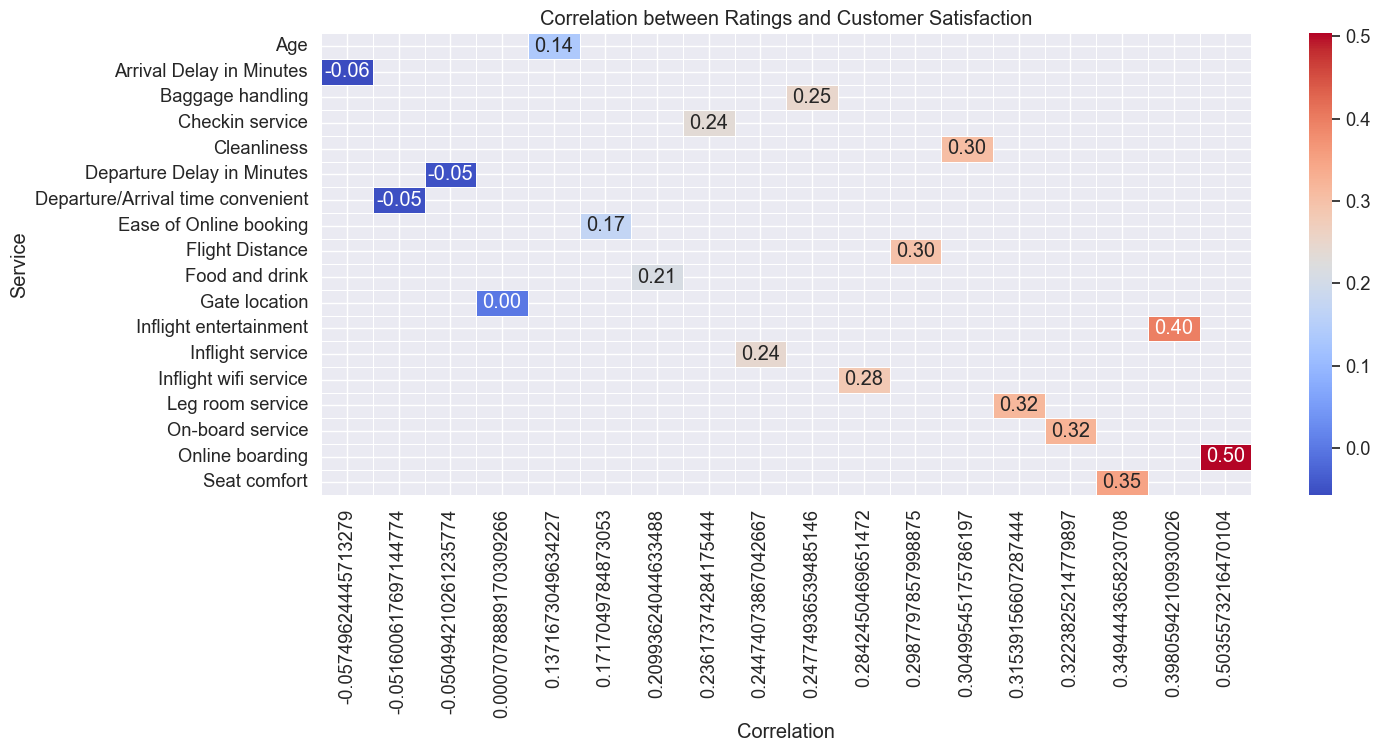

,Service,Correlation
0,Online boarding,0.503557
1,Inflight entertainment,0.398059
2,Seat comfort,0.349444
3,On-board service,0.322383
4,Leg room service,0.315392
5,Cleanliness,0.304995
6,Flight Distance,0.298780
7,Inflight wifi service,0.284245
8,Baggage handling,0.247749
9,Inflight service,0.244741


In [ ]:
# Get the correlation matrix between the ratings and satisfaction
rating_cols = ['Age', 'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes', *int8_cols]

correlation_matrix = df[rating_cols].corrwith(df['satisfaction'].cat.codes)

# Reshape the correlation matrix into a DataFrame
correlation_df = correlation_matrix.reset_index()
correlation_df.columns = ['Service', 'Correlation']
correlation_df.sort_values(by='Correlation', ascending=False, ignore_index=True, inplace=True)

# Visualize the correlation matrix as a heatmap
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data=correlation_df.pivot(index='Service', columns='Correlation', values='Correlation'),
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            ax=ax)
ax.set_title('Correlation between Ratings and Customer Satisfaction')
plt.show()
correlation_df 


Tabel yang diberikan tampaknya menunjukkan korelasi antara layanan penerbangan dengan variabel lain. Korelasi adalah ukuran seberapa kuat hubungan antara dua variabel dalam dataset. Nilai korelasi dapat berkisar antara -1 dan 1, di mana nilai 1 menunjukkan korelasi positif yang sempurna antara dua variabel, sedangkan nilai -1 menunjukkan korelasi negatif yang sempurna antara dua variabel.

Dalam tabel tersebut, layanan penerbangan yang memiliki korelasi tertinggi dengan variabel lain adalah "Online Boarding" dengan korelasi positif sebesar 0.503557. Ini berarti bahwa ada hubungan positif yang cukup kuat antara layanan online boarding dan variabel lain dalam dataset. Sedangkan "Gate Location" memiliki korelasi terendah dengan variabel lain, hanya sebesar 0,000708, yang menunjukkan bahwa hubungan antara "Gate Location" dan variabel lainnya sangat lemah.

### Importance of Aspects

### Detail

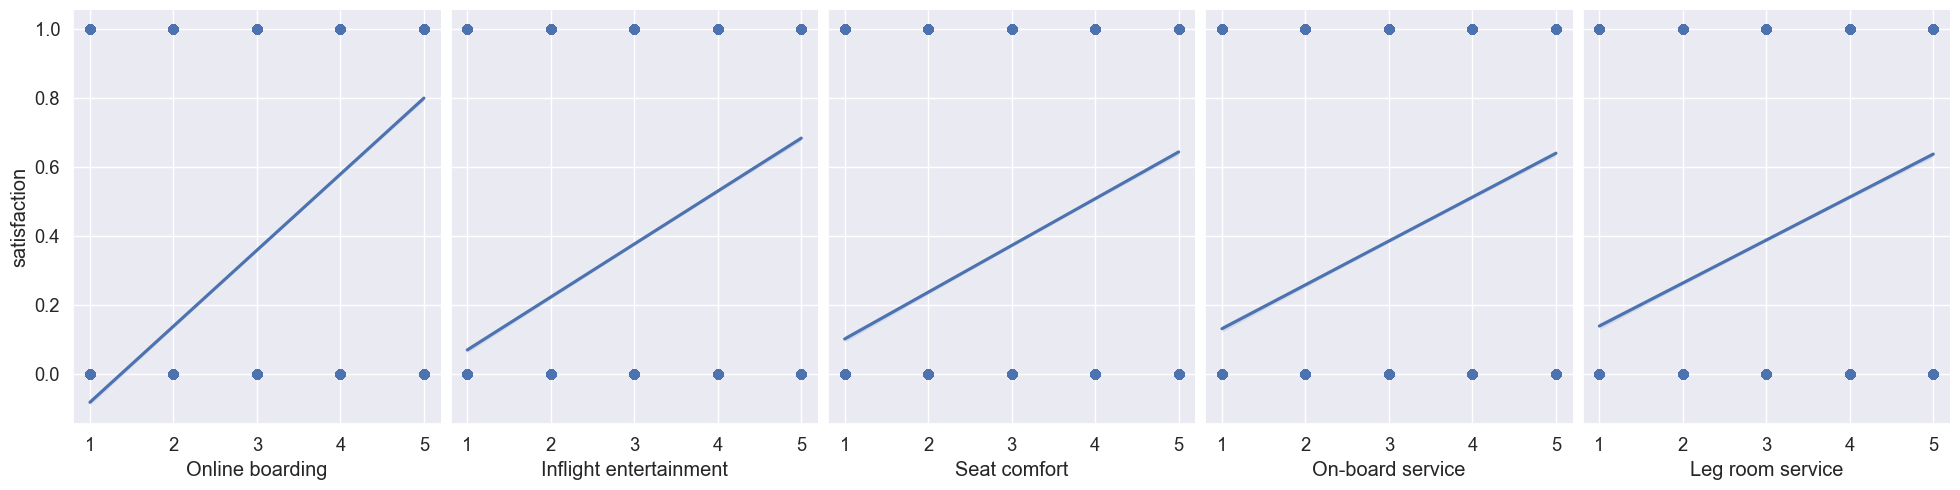

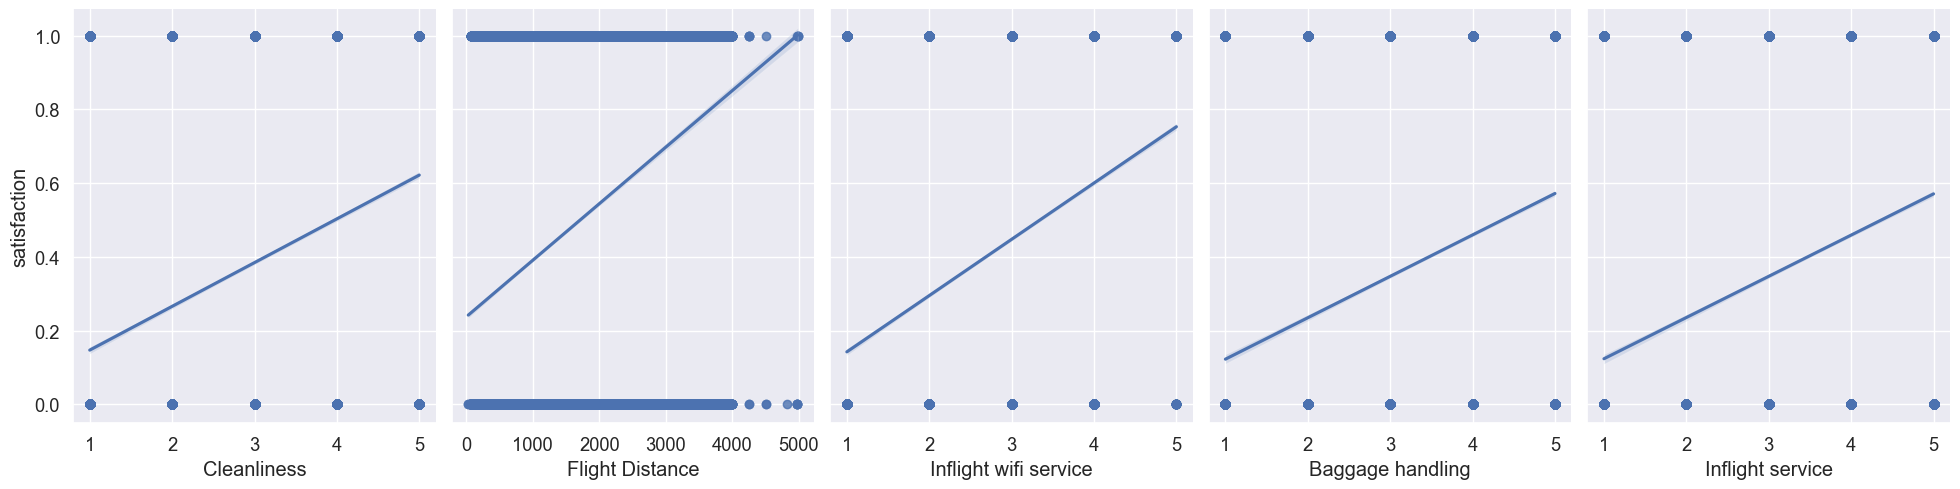

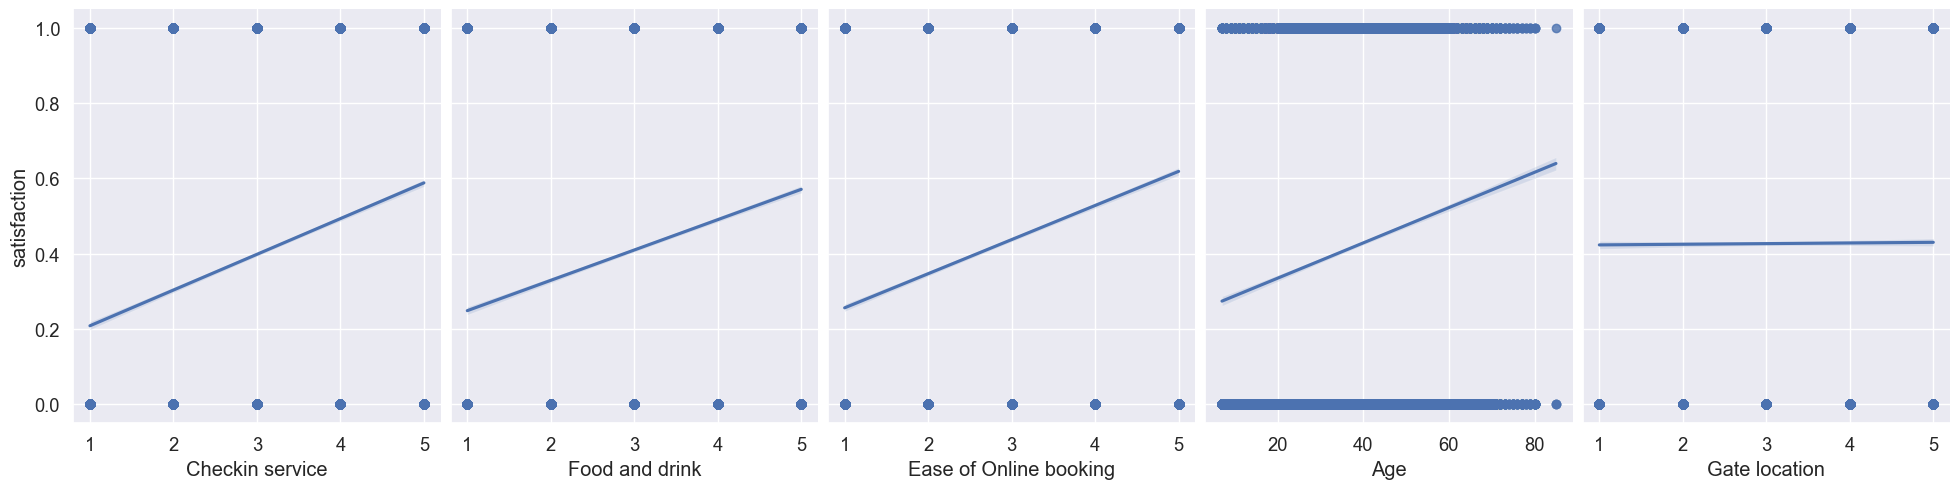

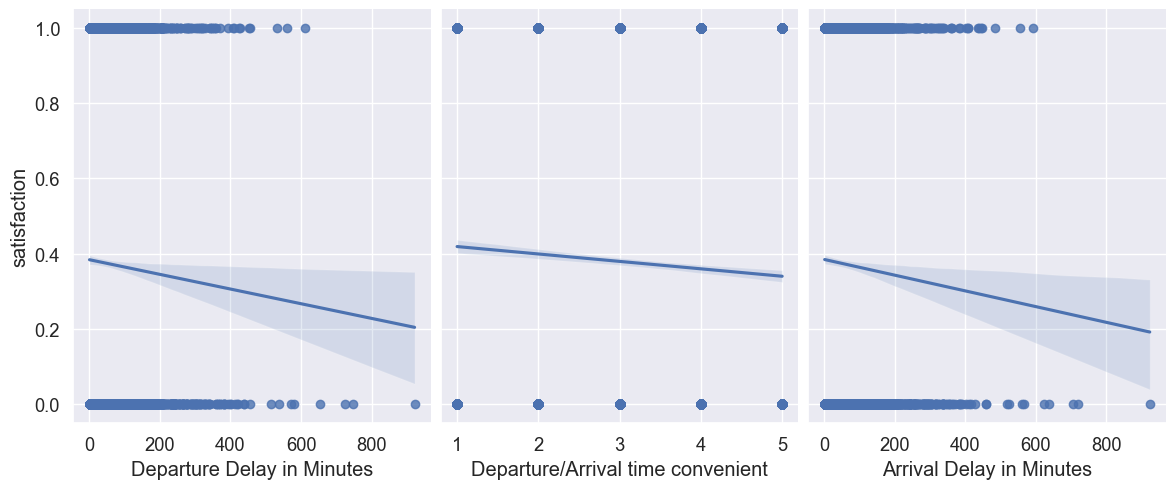

In [ ]:

satisfaction_col = 'satisfaction'
df_sample = df.sample(frac=0.3, random_state=42)
df_sample[satisfaction_col] = df_sample[satisfaction_col].cat.codes

rating_cols_sorted = correlation_df['Service']
# Split int8_cols into three parts
split_into = 4
n = len(rating_cols_sorted)
chunk_size = n//split_into + 1
rating_cols_chunks = [rating_cols_sorted[i:i+chunk_size] for i in range(0, n, chunk_size)]

for cols in rating_cols_chunks:
    # Filter out rows where any of the int8 columns have a value of 0
    mask = (df_sample[cols] != 0).all(axis=1)
    filtered_df = df_sample.loc[mask]

    # Create a pairplot of the ratings and the satisfaction level
    sns.pairplot(data=filtered_df, x_vars=cols, y_vars=[satisfaction_col], kind='reg', height=5, aspect=0.8)

    # Show the plot
    plt.show()

Dari sini kita bisa lihat bahwa Aspek berikut
1.  Online boarding
2. Inflight entertainment
3. Seat comfort
4. On.board service
5. Leg room service
6. Cleanliness

Vital terhadap Satisfaction penumpang.

# Conclusion

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut :

1. Siapa penumpang yang paling banyak menggunakan jasa penerbangan perusahaan?
* Dari 103,904 data, demografik umur yang sering mengunakan jasa perusahaan adalah demografi 30-59 tahun (60k penumpang [60%]).

#Informasi Tambahan
* Demografi setelah umur 60 tahun berkurang sebanyak `50%`
* Loyaltas pada penumpang di bawah umur 30 kurang dari 25% dari total Loyaltas pada perusahaan
* Penumpang 30-59 tahun menggunakan Jasa perusahaan untuk kebutuhan Bisnis
* Penumpang 30-59 tahun juga mengunakan class Business class
* Satisfaction yang paling banyak dapat dilihat dari penumpang adalah dari demografik 30-59 (70%) dan dibawah 30 hanya dibawah 25%

2. Apa aspek yang penting untuk satisfaction penumpang?
* Aspek yang vital untuk satisfaction penumpang:
    1.  Online boarding
    2. Inflight entertainment
    3. Seat comfort
    4. On board service
    5. Leg room service
    6. Cleanliness

#Informasi Tambahan
* Service yang paling disukai oleh penumpang perusahaan adalah *Baggage Handling*
* Loyalty berkaitan dengan satisfaction, dan semakin satisfied penumpang, semakin memungkinkan penumpang akan loyal pada perusahaan.


## Recommendable Actions


Berikut adalah beberapa rekomendasi yang dapat dilakukan oleh perusahaan transportasi udara berdasarkan temuan dari laporan:

1. Meningkatkan aspek yang vital untuk penumpang. Terutama pada Online Boarding, dan Kebersihan pesawat secara umum.
 Namun perlu juga aspek lain tetap diperhatikan. Berikut adalah beberapa rekomendasi yang dapat dilakukan oleh perusahaan transportasi udara untuk meningkatkan pelayanan berdasarkan aspek-aspek tersebut:
- Online boarding: Perusahaan dapat meningkatkan online boarding dengan memastikan bahwa sistemnya berfungsi dengan baik dan mudah digunakan oleh pelanggan. Perusahaan dapat memperbaiki fitur-fitur seperti check-in online, pemilihan kursi, dan boarding pass elektronik untuk memberikan pengalaman yang lebih mudah dan nyaman bagi pelanggan.
- Inflight entertainment: Perusahaan dapat meningkatkan inflight entertainment dengan menawarkan berbagai pilihan film, acara TV, dan musik terbaru. Selain itu, perusahaan dapat memperbaiki kualitas layar dan suara pada setiap kursi, sehingga pelanggan dapat menikmati pengalaman hiburan yang lebih baik.
- Seat comfort: Perusahaan dapat meningkatkan kenyamanan kursi dengan menyediakan kursi yang lebih ergonomis dan dapat disesuaikan dengan preferensi setiap pelanggan. Perusahaan juga dapat memperbaiki fasilitas seperti sandaran tangan dan bantal untuk memberikan kenyamanan yang lebih baik bagi pelanggan.
- On board service: Perusahaan dapat meningkatkan pelayanan di atas pesawat dengan melatih staf untuk memberikan layanan yang lebih baik dan lebih ramah kepada pelanggan. Selain itu, perusahaan dapat meningkatkan variasi makanan dan minuman yang disajikan, serta memperbaiki kualitas makanan dan minuman yang diberikan kepada pelanggan.
- Leg room service: Perusahaan dapat meningkatkan leg room service dengan menyediakan ruang kaki yang lebih luas di setiap kursi, terutama pada kelas bisnis. Perusahaan juga dapat menyediakan pilihan kursi dengan leg room yang lebih luas bagi pelanggan yang membutuhkan ruang kaki yang lebih banyak.
- Cleanliness: Perusahaan dapat meningkatkan kebersihan pesawat dengan membersihkan pesawat secara lebih sering dan lebih deep cleaning. Perusahaan juga dapat memperbaiki fasilitas seperti toilet dan wastafel untuk memastikan kebersihan yang lebih baik bagi pelanggan.
- Dengan meningkatkan pelayanan berdasarkan aspek-aspek vital ini, perusahaan dapat meningkatkan kepuasan pelanggan dan mempertahankan loyalitas pelanggan dalam jangka panjang.

2. Fokuskan pada peningkatan fasilitas di kelas bisnis untuk meningkatkan loyalitas pelanggan dalam demografi 30-59 tahun. Ini karena demografi ini dianggap sebagai pelanggan yang sering menggunakan layanan perusahaan dan cenderung lebih mampu membeli tiket kelas bisnis. Perusahaan dapat memperbaiki kenyamanan dan fasilitas kelas bisnis seperti ruang duduk yang lebih luas, makanan dan minuman yang lebih baik, serta fasilitas hiburan yang lebih baik.

3. Lakukan promosi dan pemasaran yang lebih intensif pada kelas bisnis untuk demografi 30-59 tahun karena mereka cenderung sering menggunakan layanan perusahaan dan memiliki potensi menjadi pelanggan yang lebih loyal. Perusahaan dapat mengirimkan email promosi kelas bisnis, menawarkan diskon khusus atau paket khusus kepada pelanggan yang telah menggunakan layanan perusahaan sebelumnya, atau menawarkan poin loyalitas tambahan bagi pelanggan yang menggunakan kelas bisnis.

4. Kurangi pemasaran pada demografi yang lebih tua dan fokus pada kawula muda di bawah usia 30 tahun. Ini karena demografi yang lebih muda cenderung menjadi pelanggan potensial yang lebih besar dan dapat mempertahankan demografi 30-59 tahun di masa depan. Perusahaan dapat menggunakan media sosial dan platform pemasaran digital untuk menjangkau demografi yang lebih muda.

5. Investasikan pada ekspansi kelas bisnis karena perusahaan memiliki pasar terhadap usahawan dan terutama orang di usia 30-59 tahun. Perusahaan dapat meningkatkan fasilitas dan kenyamanan di kelas bisnis, menawarkan paket khusus kepada pelanggan bisnis, atau mengembangkan program loyalitas khusus untuk pelanggan bisnis. Ini dapat membantu meningkatkan penjualan tiket kelas bisnis dan meningkatkan profitabilitas perusahaan.
